# Lista 04 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Questão 01)

In [2]:
from scipy.stats import binom

k = np.array(range(0, 21))
X = binom(n=20, p=0.15) # iremos nos referenciar à X quando falarmos de Bin(n=20, \theta=0.15)

probs = X.pmf(k)
cumulative_prob = np.cumsum(probs)

- Obtenha o gráfico das probabilidades $\mathbb{P}(X = k)$ e da função de probabilidade acumulada $\mathbb{F}(x)$ para uma v.a. $X \sim \text{Bin}(n=20, \, \theta = 0.15)$. Em seguida, responda às questões abaixo.

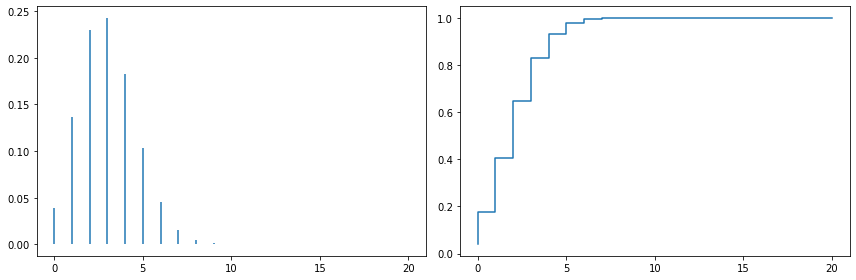

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

ax1.vlines(x=k, ymin=0, ymax=probs)
ax2.plot(k, cumulative_prob, ds='steps')

# Configurando o eixo X para representar os valores de k de 5 em 5
xticks = list(filter(lambda x: x % 5 == 0, k))
ax1.set_xticks(xticks)
ax2.set_xticks(xticks)

fig.tight_layout()
fig.show()

- Qual o valor k em que $\mathbb{P}(X = k)$ é máxima? Quanto é esta probabilidade máxima?

In [4]:
k_max = np.argmax(probs)
print('Probabilidade máxima será P(X = {}) = {:.5f}'.format(k_max, probs[k_max]))

Probabilidade máxima será P(X = 3) = 0.24283


- VISUALMENTE, obtenha uma faixa de valores $(a, b)$ na qual a probabilidade de $X \in (a, b)$ seja próxima de $1$. Procure grosseiramente obter a faixa mais estreita possível.


- **Resposta:** Na faixa de valores $0 \leq k \leq 9$, a probabilidade será próxima de $1$.

- O valor (teórico) de $\mathbb{E}(X)$ no caso de uma binomial é $n\theta$. Como é o comportamento da função $\mathbb{P}(X = k)$ no entorno deste valor $\mathbb{E}(X)$? Ela tem valores $\mathbb{P}(X = k)$ relativamente altos?


- **Resposta:** O valor teórico de $\mathbb{E}(X)$ será igual à $n\theta = 3$. No entorno desse valor, a função possui seus maiores valores, sendo um máximo global o valor de $\mathbb{P}(X = 3)$.

- Confirme esta impressão calculando $\mathbb{P}(a \leq X \leq b)$ (o restante da questão mencionava funções em R).

In [5]:
# Os intervalos em Python são da forma [a, b).
# Já em R, provavelmente temos intervalos fechados, por isso o uso da subtração por 0.01.

print('P(0 <= k <= 9) =', np.sum(probs[0:10]))

P(0 <= k <= 9) = 0.9997516180103744


- Use *qbinom* para obter o inteiro $k$ tal que $\mathbb{F}(k) = \mathbb{P}(X ≤ k) \approx 0.95$.

In [6]:
print('Valor de k =', int(X.ppf(0.95)))

Valor de k = 6


- Verifique o valor da probabilidade acumulada exata $\mathbb{F}(k)$ obtida com o inteiro acima usando *pbinom*.

In [7]:
print('P(X <= 6) =', X.cdf(6))

P(X <= 6) = 0.9780648991431549


- Gere 1000 valores aleatórios independentes de $X \sim \text{Bin}(n=20,\, \theta=0.15)$. Estes valores caíram, em sua maioria, na faixa que você escolheu mais acima? Qual a porcentagem de valores que caiu na faixa que você escolheu?

In [8]:
values = X.rvs(size=1000, random_state=42) # Fixando o estado aleatório para reprodutibilidade
filtered_values = list(filter(lambda v: v >= 0 and v <= 9, values))

percentage = 100 * (len(filtered_values) / len(values))
print('Porcentagem na faixa: {:.2f}%'.format(percentage))

Porcentagem na faixa: 100.00%


- Compare os valores das probabilidades $\mathbb{P}(X = k)$ para $k = 0, \dots, 6$ e as frequências relativas destes inteiros nos 100 valores simulados. São parecidos?


- **Resposta:** Através da tabela a seguir, onde o índice de cada linha representa o valor de $k$, nós podemos ver que os valores são bem parecidos.

In [9]:
frequencies = np.zeros(shape=(7,))
for k in range(0, 7):
    filtered_values = list(filter(lambda v: v == k, values))
    frequencies[k] = len(filtered_values) / len(values)

pd.DataFrame({
    'Probabilities': probs[0:7],
    'Frequency': frequencies
})

,Probabilities,Frequency
0,0.038760,0.042
1,0.136798,0.156
2,0.229338,0.226
3,0.242829,0.244
4,0.182122,0.165
5,0.102845,0.101
6,0.045373,0.048


# Questão 02)

- Nessa questão usarei $X_1$ e $X_2$ para representar as distribuições de Poisson com $\lambda$ igual a 0.73 e 10, respectivamente.

In [10]:
from scipy.stats import poisson

k = np.array(range(0, 21))

# Usaremos X1 para referenciar a v.a com \lambda = 0.73 e X2 com \lambda 10
# Note também que no scipy, a distribuição na verdade possui parâmetro \mu
distributions = {
    'X1': poisson(mu=0.73),
    'X2': poisson(mu=10.0)
}

probabilities = {
    'X1': distributions['X1'].pmf(k),
    'X2': distributions['X2'].pmf(k)
}

cumulative_probs = {
    'X1': np.cumsum(probabilities['X1']),
    'X2': np.cumsum(probabilities['X2'])
}

- Obtenha o gráfico das probabilidades $\mathbb{P}(X = k)$ e da função de probabilidade acumulada $\mathbb{F}(x)$ para uma v.a. $X \sim \text{Poisson}(\lambda)$ usando dois valores: $\lambda = 0.73$ e $\lambda = 10$.

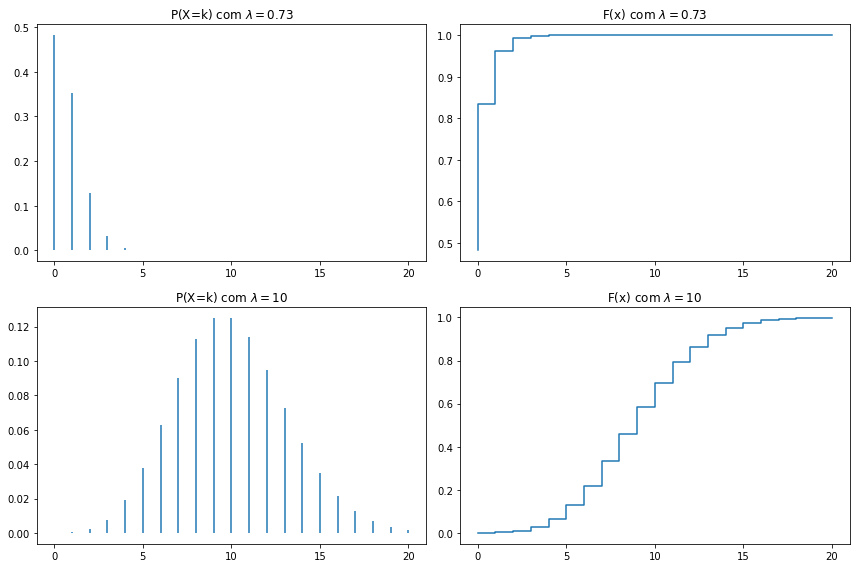

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Definindo gráficos de X1
ax1.set_title('P(X=k) com $\lambda = 0.73$')
ax2.set_title('F(x) com $\lambda = 0.73$')

ax1.vlines(x=k, ymin=0, ymax=probabilities['X1'])
ax2.plot(k, cumulative_probs['X1'], ds='steps')

# Definindo gráficos de X2
ax3.set_title('P(X=k) com $\lambda = 10$')
ax4.set_title('F(x) com $\lambda = 10$')

ax3.vlines(x=k, ymin=0, ymax=probabilities['X2'])
ax4.plot(k, cumulative_probs['X2'], ds='steps')

# Configurando o eixo X para representar os valores de k de 5 em 5
xticks = list(filter(lambda x: x % 5 == 0, k))
ax1.set_xticks(xticks)
ax2.set_xticks(xticks)
ax3.set_xticks(xticks)
ax4.set_xticks(xticks)

fig.tight_layout()
fig.show()

- O valor $k$ em que $\mathbb{P}(X = k)$ é máximo é próximo de $\mathbb{E}(X) = \lambda$?


- **Resposta**: Através de uma inspeção dos plots acima podemos afirmar que sim.

- Obtenha um intervalo de valores $(a, b)$, o mais curto possível grosseiramente, para o qual $\mathbb{P}(X \in (a, b)) \approx 1$.


- **Resposta:** Visualmente, para $X_1 \sim \text{Poisson}(\lambda=0.73)$ teremos $\mathbb{P}(X \in [0,4]) \approx 1$; já para $X_2 \sim \text{Poisson}(\lambda=10)$ teremos $\mathbb{P}(X \in [1,20]) \approx 1$.

- Usando *ppois* do R, calcule $\mathbb{P}(a \leq X \leq b)$.

In [12]:
print('P(0 <= X1 <= 4): {:.5f}'.format(np.sum(probabilities['X1'][0:5])))
print('P(1 <= X2 <= 20): {:.5f}'.format(np.sum(probabilities['X2'][1:21])))

P(0 <= X1 <= 4): 0.99905
P(1 <= X2 <= 20): 0.99837


- Gere 200 valores aleatórios independentes de $X \sim \text{Poisson}(\lambda)$ com os dois valores acima para $\lambda$.

In [13]:
random_values = {
    'X1': distributions['X1'].rvs(size=200, random_state=42),
    'X2': distributions['X2'].rvs(size=200, random_state=42)
}

print('Pequena amostra de X1:', random_values['X1'][:10])
print('Pequena amostra de X2:', random_values['X2'][:10])

Pequena amostra de X1: [0 2 0 0 0 2 0 2 0 0]
Pequena amostra de X2: [12  6 11 14  7  8  9 11  8 10]


- Compare os valores das probabilidades $\mathbb{P}(X = k)$ para $k = 0, \dots, 6$ e as frequências relativas destes inteiros nos 100 valores simulados. São parecidos?


- **Resposta:** Através das tabelas a seguir, onde o índice de cada linha representa o valor de $k$, nós podemos ver que os valores são bem parecidos.

In [14]:
frequencies = np.zeros(shape=(7,))
for k in range(0, 7):
    filtered_values = list(filter(lambda v: v == k, random_values['X1']))
    frequencies[k] = len(filtered_values) / len(random_values['X1'])

print('Tabela para X1:')
pd.DataFrame({
    'Probabilities': probabilities['X1'][0:7],
    'Frequency': frequencies
})

Tabela para X1:


,Probabilities,Frequency
0,0.481909,0.475
1,0.351794,0.355
2,0.128405,0.130
3,0.031245,0.030
4,0.005702,0.010
5,0.000833,0.000
6,0.000101,0.000


In [15]:
frequencies = np.zeros(shape=(7,))
for k in range(0, 7):
    filtered_values = list(filter(lambda v: v == k, random_values['X2']))
    frequencies[k] = len(filtered_values) / len(random_values['X2'])

print('Tabela para X2:')
pd.DataFrame({
    'Probabilities': probabilities['X2'][0:7],
    'Frequency': frequencies
})

Tabela para X2:


,Probabilities,Frequency
0,0.000045,0.000
1,0.000454,0.005
2,0.002270,0.000
3,0.007567,0.030
4,0.018917,0.005
5,0.037833,0.040
6,0.063055,0.065


# Questão 03)

- Nessa questão usarei $X_1$, $X_2$ e $X_3$ para representar as distribuições de Zipf com $\alpha$ igual a 0.5, 1 e 2, respectivamente.

In [16]:
from scipy.stats import zipf

k = np.array(range(0, 21))
alphas = [0.5, 1, 2]

# Usaremos X1, X2 e X3 para referenciar as v.a. com alpha 0.5, 1 e 2 respectivamente
# Note que no scipy, a distribuição recebe na verdade apenas \alpha ao invés de 1 + \alpha
distributions = {
    'X1': zipf(1 + alphas[0]),
    'X2': zipf(1 + alphas[1]),
    'X3': zipf(1 + alphas[2]),
}

probabilities = {
    'X1': distributions['X1'].pmf(k),
    'X2': distributions['X2'].pmf(k),
    'X3': distributions['X3'].pmf(k),
}

cumulative_probs = {
    'X1': np.cumsum(probabilities['X1']),
    'X2': np.cumsum(probabilities['X2']),
    'X3': np.cumsum(probabilities['X3'])
}

- Usando os valores $\alpha$ iguais à 1/2, 1 e 2, obtenha em R o gráfico das probabilidades $\mathbb{P}(X = k)$ e da função de probabilidade acumulada $\mathbb{F}(x)$ para uma v.a. $X \sim \text{Zipf}(\alpha)$ com $N = \infty$. Faça a escala horizontal variar nos inteiros de 1 a 20. Obtenha $\mathbb{F}(x)$ usando o comando *cumsum* que retorna o vetor de somas acumuladas de um vetor.

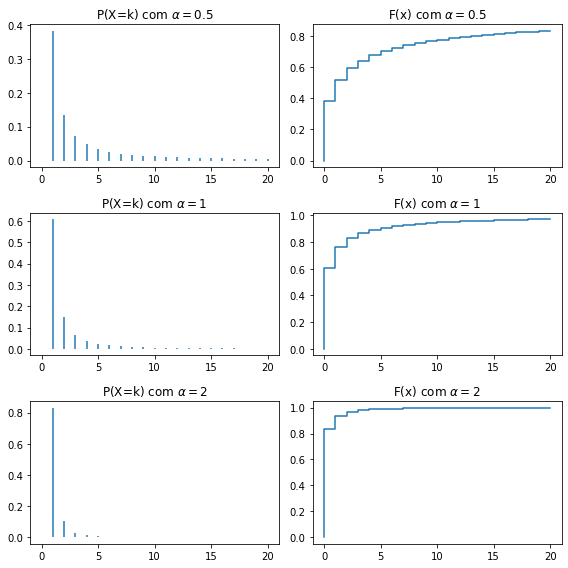

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

xticks = list(filter(lambda x: x % 5 == 0, k))
for i in range(3):
    axs[i, 0].set_title(r'P(X=k) com $\alpha = {}$'.format(alphas[i]))
    axs[i, 1].set_title(r'F(x) com $\alpha = {}$'.format(alphas[i]))
    
    axs[i, 0].vlines(x=k, ymin=0, ymax=probabilities[f'X{i+1}'])
    axs[i, 1].plot(k, cumulative_probs[f'X{i+1}'], ds='steps')
    
    axs[i, 0].set_xticks(xticks)
    axs[i, 1].set_xticks(xticks)

fig.tight_layout()
fig.show() 

- Obtenha a razão entre valores sucessivos de $\mathbb{P}(X = k)$.
- Isto é, mostre que:
$$
\frac{\mathbb{P}(X=k+1)}{\mathbb{P}(X=k)} = \left( \frac{k}{k+1} \right)^{1+\alpha}
$$
- Perceba que, quando $k$ cresce, a razão é sempre menor que 1 mas cada vez mais próxima de 1, e portanto $\mathbb{P}(X=k+1) \approx \mathbb{P}(X=k)$ se $k$ for bem grande.

In [18]:
ratios = {
    'X1': (k / (k+1))**(1+alphas[0]),
    'X2': (k / (k+1))**(1+alphas[1]),
    'X3': (k / (k+1))**(1+alphas[2])
}

print('Tabela da razão entre os valores sucessivos de P(X=k) para cada distribuição:')
pd.DataFrame(ratios)

Tabela da razão entre os valores sucessivos de P(X=k) para cada distribuição:


,X1,X2,X3
0,0.000000,0.000000,0.000000
1,0.353553,0.250000,0.125000
2,0.544331,0.444444,0.296296
3,0.649519,0.562500,0.421875
4,0.715542,0.640000,0.512000
5,0.760726,0.694444,0.578704
6,0.793560,0.734694,0.629738
7,0.818488,0.765625,0.669922
8,0.838052,0.790123,0.702332
9,0.853815,0.810000,0.729000


- Quando $\alpha > 0$ crescer, o que você espera que aconteça ao gerar inteiros Zipf com estes $\alpha$ grandes em relação a gerar com $\alpha$ apenas ligeiramente maior que 1.


- **Resposta:** Todos os inteiros gerados serão 1. Podemos ver isso através do código a seguir, onde geramos amostras de 100 valores aleatórios que seguem uma distribuição Zipf com $\alpha = 10$.

In [19]:
alpha = 10
zipf(1 + alpha).rvs(size=100, random_state=42)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- Faça um gráfico dos pontos $(\log(k), \log(\mathbb{P}(X = k))$. O resultado é o que você esperava? Usando *abline(log(C), -(1+alpha))*, sobreponha uma reta com intercepto $\log(C)$ e inclinação $−(1 + \alpha)$.

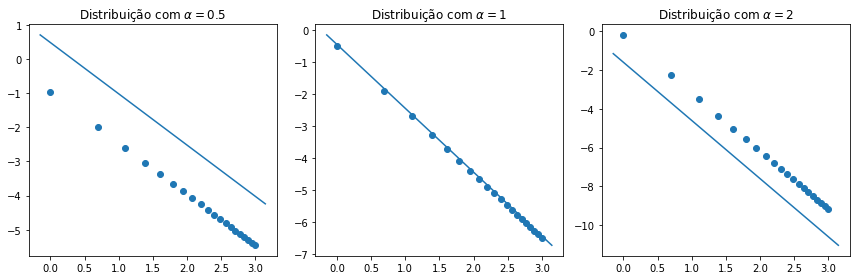

In [20]:
from scipy.special import zetac

# Ignorando possíveis erros relacionados com divisão por zero no cálculo do log
np.seterr(divide='ignore')

fig, axs = plt.subplots(ncols=3, figsize=(12,4))
xticks = list(filter(lambda x: x % 5 == 0, k))

for i in range(3):
    axs[i].set_title(r'Distribuição com $\alpha = {}$'.format(alphas[i]))
    axs[i].scatter(np.log(k), np.log(probabilities[f'X{i+1}']))
    
    # Definindo a reta com o intercepto e inclinação solicitados
    C = zetac(1 + alphas[i])
    x = np.array(axs[i].get_xlim())
    y = np.log(C) - (1 + alphas[i]) * x
    axs[i].plot(x, y)
    
fig.tight_layout()
fig.show() 

- De fato, como mencionado anteriormente, $\mathbb{P}(X = k) \approx \mathbb{P}(X = k+1)$ para valores grandes de $k$.
- Além disso, podemos notar que a depender do valor $\alpha$ escolhido, a reta solicitada fica acima de todos os pontos ($\alpha = 0.5$), intercepta todos os pontos ($\alpha = 1.0$) ou fica abaixo de todos os pontos ($\alpha = 2.0$).

- Gere 400 valores de Zipf com $\alpha$ igual a 1/2, 1 e 2. Verifique que apesar da maioria dos valores ficar num intervalo limitado, valores extremamente grandes (relativamente aos demais) são gerados com facilidade. Repita a geração algumas vezes para observar este efeito. Reporte na lista apenas uma dessas repetições.

In [21]:
# Irei considerar um valor x > 1 como um valor grande, relativamente aos demais.
# O experimento será executado 10.000 vezes e iremos tirar
# a média, mediana e desvio padrão da razão entre (# valores > 1) / (# total).

n_iterations = 10000
ratios = {'X1': [], 'X2': [], 'X3': []}

for i in range(3):
    for _ in range(n_iterations):
        values = distributions[f'X{i+1}'].rvs(400)
        ratios[f'X{i+1}'] += [len(list(filter(lambda x: x > 1, values))) / 400]

In [22]:
statistics = {
    'X1': [np.mean(ratios['X1']), np.median(ratios['X1']), np.std(ratios['X1'], ddof=1)],
    'X2': [np.mean(ratios['X2']), np.median(ratios['X2']), np.std(ratios['X2'], ddof=1)],
    'X3': [np.mean(ratios['X3']), np.median(ratios['X3']), np.std(ratios['X3'], ddof=1)],
}

print('Estatísticas relacionadas às porcentagens de valores maiores que 1')
pd.DataFrame(statistics, index=['mean','median','std']).T

Estatísticas relacionadas às porcentagens de valores maiores que 1


,mean,median,std
X1,0.617428,0.6175,0.024458
X2,0.392286,0.3925,0.024665
X3,0.167755,0.1675,0.018538
